# MAC0317/MAC5920
## Introdução ao Processamento de Sinais Digitais
## Seção 7.3: O Banco de Filtros Geral de 1 Estágio e 2 Canais

### Seção 7.3.1: Formulação para filtros FIR arbitrários

Tudo o que foi desenvolvido na seção 7.2 pode ser generalizado para uma coleção bastante geral de pares de filtro $l_a,l_s$ (passa-baixas de análise e de síntese) e $h_a,h_s$ (passa-altas de análise e de síntese), desde que determinados cuidados sejam tomados para garantir que *nenhuma informação é perdida no processo* (garantindo com isso que *a reconstrução do sinal original seja perfeita*).

O objetivo será preservar a estrutura geral da transformada, ou seja, a etapa de análise consiste em

> 1. Filtrar: $l_a*x$ e $h_a*x$;
> 2. Subamostrar: $X_l=D(l_a*x)$ e $X_h=D(h_a*x)$;
> 3. Combinar os resultados: $X=(X_l,X_h)$;

enquanto a etapa de síntese consiste em

> 1. Superamostrar: computar $U(X_l)$ e $U(X_h)$;
> 2. Filtrar: $v_l=l_s*U(X_l)$ e $v_h=h_s*U(X_h)$;
> 3. Combinar os resultados: $x=v_l+v_h$.

### Observação 7.2

O esquema descrito acima é chamado de *banco de filtros em dois canais* porque os sinais são separados em duas componentes, processadas paralelamente por dois filtros com características espectrais diferentes (um passa-baixas e um passa-altas).

*Bancos de filtros em $M$ canais* funcionam de maneira análoga, porém o sinal de entrada é filtrado paralelamente por $M$ filtros, dando origem a $M$ componentes $X_1,X_2,\ldots,X_M$ que capturariam faixas de frequência distintas. Os sinais filtrados são geralmente subamostrados numa relação de $M:1$, a fim de eliminar as redundâncias.

A teoria que trata do desenho de bancos de filtros de $M$ canais a fim de garantir reconstrução perfeita é chamada de *codificação sub-banda* (*subband coding*) e foge ao escopo desse curso.

### Reconstrução perfeita (definição 7.3)

Dado um banco de filtros $\{l_a,h_a,l_s,h_s\}$ que define o par de transformações $x\mapsto X=(X_l,X_h)=(D(l_a*x),D(h_a*x))$ (análise) e $X\mapsto l_s*U(X_l)+h_s*U(X_h)$ (síntese), dizemos que o banco de filtros possui *reconstrução perfeita* se a equação de síntese é a inversa da equação de análise, ou seja, se

$$x = l_s*U(D(l_a*x))+h_s*U(D(h_a*x))$$

para qualquer sinal $x$. Um banco de filtros com reconstrução perfeita também é chamado de *biortogonal*.

Ocasionalmente consideraremos também filtros cuja reconstrução ocorre com um certo atraso, como é o caso do banco de Haar com filtros causais. Nesse caso, a condição de reconstrução perfeita equivale a existir algum $m\in\mathbb{Z}$ tal que

$$S^m(x) = l_s*U(D(l_a*x))+h_s*U(D(h_a*x))$$

para qualquer sinal $x$, onde $S$ é o operador de atraso definido na seção 7.2 (e $S^m$ é sua aplicação repetida $m$ vezes, ou seja, um atraso de $m$ amostras).

### Desenho de bancos de filtros

A equação de reconstrução perfeita não ajuda muito na construção de bancos de filtros em geral, já que equivale a um sistema de infinitas equações (lembre-se que os sinais estão em $L^2(\mathbb{Z})$) e envolve produtos de coeficientes dos filtros de análise e síntese.

Em alguns casos muito particulares, como quando os filtros de análise já são conhecidos, é possível desenvolver essas equações para construir os filtros correspondentes de síntese, como veremos no exemplo a seguir.

### Exemplo 7.3

Considere que usaremos os filtros de análise de Haar ($(l_a)_0=(l_a)_1=\frac{1}{2}$ e $(h_a)_0=-(h_a)_1=\frac{1}{2}$, com todos os demais coeficientes nulos), e desejamos encontrar filtros de síntese (supondo desconhecidos) que satisfaçam a equação de reconstrução perfeita sem atraso

$$x = l_s*U(D(l_a*x))+h_s*U(D(h_a*x)),$$

que pode ser escrita em função de cada amostra do sinal $x$ como

$$x_n = (l_s*U(D(l_a*x)))_n+(h_s*U(D(h_a*x)))_n.$$

Lembrando que $(l_a*x)_n=\frac{1}{2}(x_n+x_{n-1})$ e $(h_a*x)_n=\frac{1}{2}(x_n-x_{n-1})$, e que $U(D(y))_n=\left\{\begin{array}{ll}y_n,&\mbox{se $n$ é par,}\\0,&\mbox{se $n$ é ímpar,}\end{array}\right.$, podemos re-escrever a equação de reconstrução perfeita como

$$\begin{array}{ll}
x_n&=\displaystyle\frac{1}{2}\sum_{k\ \small\mbox{par}}(x_k+x_{k-1})(l_s)_{n-k}+(x_k-x_{k-1})(h_s)_{n-k}\\
&=\displaystyle\frac{1}{2}\sum_{k\ \small\mbox{par}}x_k\left[(l_s)_{n-k}+(h_s)_{n-k}\right]+x_{k-1}\left[(l_s)_{n-k}-(h_s)_{n-k}\right],\end{array}$$

e ela precisa valer para qualquer sinal $x\in L^2(\mathbb{Z})$.

Considere o sinal de entrada $x=\delta$ dado por $x_0=1$ e $x_k=0,\ \forall k\neq 0$. Então a equação anterior 

$$\begin{array}{ll}
x_n&=\displaystyle\frac{1}{2}\sum_{k\ \small\mbox{par}}x_k\left[(l_s)_{n-k}+(h_s)_{n-k}\right]+x_{k-1}\left[(l_s)_{n-k}-(h_s)_{n-k}\right]\\
&=\displaystyle\frac{1}{2}x_0\left[(l_s)_{n-0}+(h_s)_{n-0}\right]\quad\quad\mbox{(sobra apenas $k=0$ na $\sum$)}\end{array}$$

se reduz a

$$(l_s)_{n}+(h_s)_{n}=\left\{\begin{array}{ll}2,&n=0,\\0,&n\neq 0.\end{array}\right.$$

Considere agora o sinal de entrada $x=S(\delta)$ dado por $x_1=1$ e $x_k=0,\ \forall k\neq 1$. Então a equação anterior 

$$\begin{array}{ll}
x_n&=\displaystyle\frac{1}{2}\sum_{k\ \small\mbox{par}}x_k\left[(l_s)_{n-k}+(h_s)_{n-k}\right]+x_{k-1}\left[(l_s)_{n-k}-(h_s)_{n-k}\right]\\
&=\displaystyle\frac{1}{2}x_1\left[(l_s)_{n-2}-(h_s)_{n-2}\right]\quad\quad\mbox{(sobra apenas $k=2$ na $\sum$)}\end{array}$$

se reduz a

$$(l_s)_{n-2}-(h_s)_{n-2}=\left\{\begin{array}{ll}2,&n=1,\\0,&n\neq 1,\end{array}\right.$$

ou equivalentemente

$$(l_s)_{n}-(h_s)_{n}=\left\{\begin{array}{ll}2,&n=-1,\\0,&n\neq -1,\end{array}\right.$$

Juntando as duas condições

$$(l_s)_{n}+(h_s)_{n}=\left\{\begin{array}{ll}2,&n=0,\\0,&n\neq 0.\end{array}\right.\quad\quad\quad(l_s)_{n}-(h_s)_{n}=\left\{\begin{array}{ll}2,&n=-1,\\0,&n\neq -1,\end{array}\right.$$

podemos concluir para $n=0$ que $(l_s)_0=(h_s)_0=1$ e para $n=-1$ que $(l_s)_{-1}=-(h_s)_{-1}=1$, ao passo que para $n\neq 0,-1$ concluímos que $(l_s)_n=(h_s)_n=0$.

Isso mostra que os filtros $l_s=(\ldots,0,1,\overbrace{1}^{\small n=0},0,\ldots)$ e $h_s=(\ldots,0,-1,\overbrace{1}^{\small n=0},0,\ldots)$, que já sabíamos obedecer a condição de reconstrução perfeita, são na realidade **os únicos filtros de síntese** compatíveis com o par de filtros de análise $(l_a,h_a)$ correspondentes ao filtro da média e da diferença.

### Exemplo 7.4

Um outro conjunto de filtros biortogonais que estudaremos são os filtros **Le Gall 5/3**:

$$\begin{array}{lcc}
l_a&=&(\ldots,0,-\frac{1}{8},\frac{1}{4},\overbrace{\frac{3}{4}}^{\small n=0},\frac{1}{4},-\frac{1}{8},0,\ldots)\\
h_a&=&(\ldots,0,-\frac{1}{2},1,-\frac{1}{2},0,\ldots)\\
l_s&=&(\ldots,0,\frac{1}{2},1,\frac{1}{2},0,\ldots)\\
h_s&=&(\ldots,0,-\frac{1}{8},-\frac{1}{4},\frac{3}{4},-\frac{1}{4},-\frac{1}{8},0,\ldots)
\end{array}$$

Observe como os coeficientes dos filtros parecem estar relacionados: $l_a$ possui "quase" os mesmos coeficientes que $h_s$, e o mesmo ocorre com $h_a$ e $l_s$. Os detalhes da construção desse banco de filtros serão apresentados na seção 7.7.

### Seção 7.3.3: Bancos de filtro ortogonais

Existem infinitos bancos de filtro que satisfazem a equação de reconstrução perfeita, por isso é interessante considerar condições que restrinjam as escolhas possíveis para o desenho de filtros. Uma dessas condições é considerar conhecidos os filtros de análise, como fizemos no exemplo 7.3. Outra possibilidade é criar vínculos entre os coeficientes dos filtros de análise e de síntese, como aqueles vistos no banco de filtros Le Gall 5/3, ou nos próprios filtros de Haar, que satisfazem

$$(l_s)_k = 2(l_a)_{-k}\quad\quad\mbox{e}\quad\quad(h_s)_k = 2(h_a)_{-k}.$$

Esse é um tipo de situação muito comum, e geralmente é possível eliminar a constante $C=2$ na condição acima através de uma mudança de escala adequada. Nesse caso, buscaremos filtros que satisfazem

$$(l_s)_k = (l_a)_{-k}\quad\quad\mbox{e}\quad\quad(h_s)_k = (h_a)_{-k}.$$

Bancos de filtros que satisfazem essa condição são chamados de ortogonais, por razões que ficarão claras na seção 7.5.

### Exemplo 7.5

O banco de filtros de Haar, que satisfaz a condição

$$(l_s)_k = 2(l_a)_{-k}\quad\quad\mbox{e}\quad\quad(h_s)_k = 2(h_a)_{-k}.$$

pode facilmente satisfazer a condição de ortogonalidade fatorando-se a constante $2=\sqrt{2}\sqrt{2}$ e passando um dos termos para o outro lado:

$$\frac{1}{\sqrt{2}}(l_s)_k = \sqrt{2}(l_a)_{-k}\quad\quad\mbox{e}\quad\quad\frac{1}{\sqrt{2}}(h_s)_k = \sqrt{2}(h_a)_{-k}.$$

Essa fatoração não afeta a condição de reconstrução perfeita porque todas as operações envolvidas são lineares e os fatores novos se cancelam:

$$x = \frac{1}{\sqrt{2}}l_s*U(D(\sqrt{2}l_a*x))+\frac{1}{\sqrt{2}}h_s*U(D(\sqrt{2}h_a*x)).$$

Assim, definindo-se

$$\begin{array}{lllrcccl}
\tilde{l}_a&=\sqrt{2}(l_a)&=&(\ldots,0,&0,&\overbrace{\frac{\sqrt{2}}{2}}^{\small n=0},&\frac{\sqrt{2}}{2},&0,\ldots)\\
\tilde{l}_s&=\frac{1}{\sqrt{2}}(l_s)&=&(\ldots,0,&\frac{\sqrt{2}}{2},&\frac{\sqrt{2}}{2},&0,&0,\ldots)\\
\tilde{h}_a&=\sqrt{2}(h_a)&=&(\ldots,0,&0,&\frac{\sqrt{2}}{2},&-\frac{\sqrt{2}}{2},&0,\ldots)\\
\tilde{h}_s&=\frac{1}{\sqrt{2}}(h_s)&=&(\ldots,0,&-\frac{\sqrt{2}}{2},&\frac{\sqrt{2}}{2},&0,&0,\ldots),
\end{array}$$

teremos um banco de filtros com reconstrução perfeita que satisfaz

$$(\tilde{l}_s)_k = (\tilde{l}_a)_{-k}\quad\quad\mbox{e}\quad\quad(\tilde{h}_s)_k = (\tilde{h}_a)_{-k}.$$

In [46]:
import numpy as np

l_analysis = np.array([0.5, 0.5])
h_analysis = np.array([0.5, -0.5])
l_synthesis = [1, 1]
h_synthesis = [-1, 1]

rescaling_factor = np.sqrt(2)
l_analysis_ortogonal = l_analysis * rescaling_factor
h_analysis_ortogonal = h_analysis * rescaling_factor
l_synthesis_ortogonal = l_synthesis / rescaling_factor
h_synthesis_ortogonal = h_synthesis / rescaling_factor

print(f'l_analysis_ortogonal={l_analysis_ortogonal}')
print(f'l_synthesis_ortogonal={l_synthesis_ortogonal}')
print(f'h_analysis_ortogonal={h_analysis_ortogonal}')
print(f'h_synthesis_ortogonal={h_synthesis_ortogonal}')

assert np.allclose(l_analysis_ortogonal, np.flip(l_synthesis_ortogonal))
assert np.allclose(h_analysis_ortogonal, np.flip(h_synthesis_ortogonal))



l_analysis_ortogonal=[0.70710678 0.70710678]
l_synthesis_ortogonal=[0.70710678 0.70710678]
h_analysis_ortogonal=[ 0.70710678 -0.70710678]
h_synthesis_ortogonal=[-0.70710678  0.70710678]


In [17]:
import numpy as np
import math
from scipy.fft import fft, ifft 
import matplotlib.pyplot as plt  

# essa versão aceita x e h de tamanhos diferentes.
# e aproveita que h é menor para iterar menos vezes
def conv_circular(x, h):
    N = len(x)
    MM = len(h)
    w = np.zeros(N, dtype='complex')
    for k in range(N):
        for m in range(MM):
            w[k] += h[m] * x[k-m]
    return w

def conv_circular_golden(x, h):
    N = max(len(x), len(h))
    return ifft(fft(x,N) * fft(h,N))

def test_conv_circular(N=10):
    x = np.random.rand(N)
    h = np.random.rand(N//3)
    
    golden = conv_circular_golden(x,h)
    dut = conv_circular(x,h)
    assert np.allclose(golden, dut), f'Teste falhou \golden=\n{golden} \n\ndut=\n{dut}'
    print('Passou test_conv_circular')
    
test_conv_circular()

Passou test_conv_circular


In [18]:
def downsample(x): return x[0:len(x):2]

def upsample(x): return np.concatenate([np.insert(x, slice(1, None), 0), np.zeros(1)])


In [42]:
# refazendo com os dois exemplos de sinal
def create_signal(example=1):
    if example == 1:
        N = 128
        k = np.arange(N)
        x = 0.5 * np.sin(2*math.pi*3*k/N) + 0.5 * np.sin(2*math.pi*49*k/N)
    else:
        N = 1024
        # sinal com vários trechos independentes
        x = np.zeros(1024)
        x[0:350] = np.sin(2 * math.pi * 12 *  np.arange(0, 1, 1/N)[:350]) 
        x[350:500] = 0.8 * np.ones(150)
        x[500:800] = 0.3 * np.ones(300)
        
    return x


In [49]:
def haar_two_stages_analysis(x, kind='traditional'): 
    l_analysis = np.array([0.5, 0.5])
    h_analysis = np.array([0.5, -0.5])

    if kind == 'ortogonal':
        rescaling_factor = np.sqrt(2)
        l_analysis = l_analysis * rescaling_factor
        h_analysis = h_analysis * rescaling_factor
    
    Xl = conv_circular(x, l_analysis)
    Xh = conv_circular(x, h_analysis)
   
    Xl_condensed = downsample(Xl)
    Xh_condensed = downsample(Xh)

    X = np.concatenate([Xl_condensed, Xh_condensed])
    return X

def haar_two_stages_synthesis(X, kind='traditional'):
    N = len(X)
    # transformado em filtro causal 
    l_synthesis = np.array([1, 1])
    h_synthesis = np.array([-1, 1])
    
    if kind == 'ortogonal':
        rescaling_factor = np.sqrt(2)
        l_synthesis = l_synthesis / rescaling_factor
        h_synthesis = h_synthesis / rescaling_factor
    
    Xl_condensed = X[:N//2]
    Xh_condensed = X[N//2:]
    Xl = upsample(Xl_condensed)
    Xh = upsample(Xh_condensed)
    

    vl = conv_circular(Xl, l_synthesis)
    vh = conv_circular(Xh, h_synthesis)
    
    x_delayed = vl + vh
    x = np.roll(x_delayed, -1)
    
    return x


def test_haar(x, kind):
    X = haar_two_stages_analysis(x, kind)
    x_reconstruido = haar_two_stages_synthesis(X, kind)
    
    plt.suptitle(f'{kind}')
    fig,ax = plt.subplots(1,2, figsize=(18,5))
    
    ax[0].plot(x, label='original');
    ax[1].plot(x_reconstruido, label='reconstruído')
    

    distorcao = np.linalg.norm(x_reconstruido-x)
    plt.suptitle(f"{kind}   distorção = {distorcao:.2e}",fontsize=20)
    plt.show()



<Figure size 640x480 with 0 Axes>

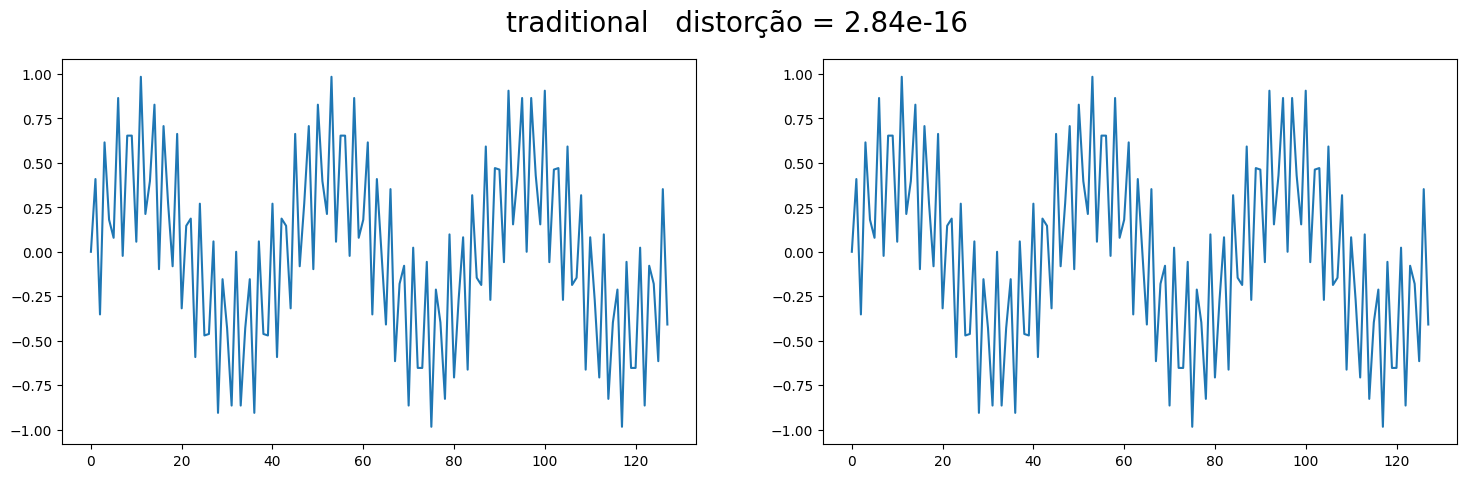

<Figure size 640x480 with 0 Axes>

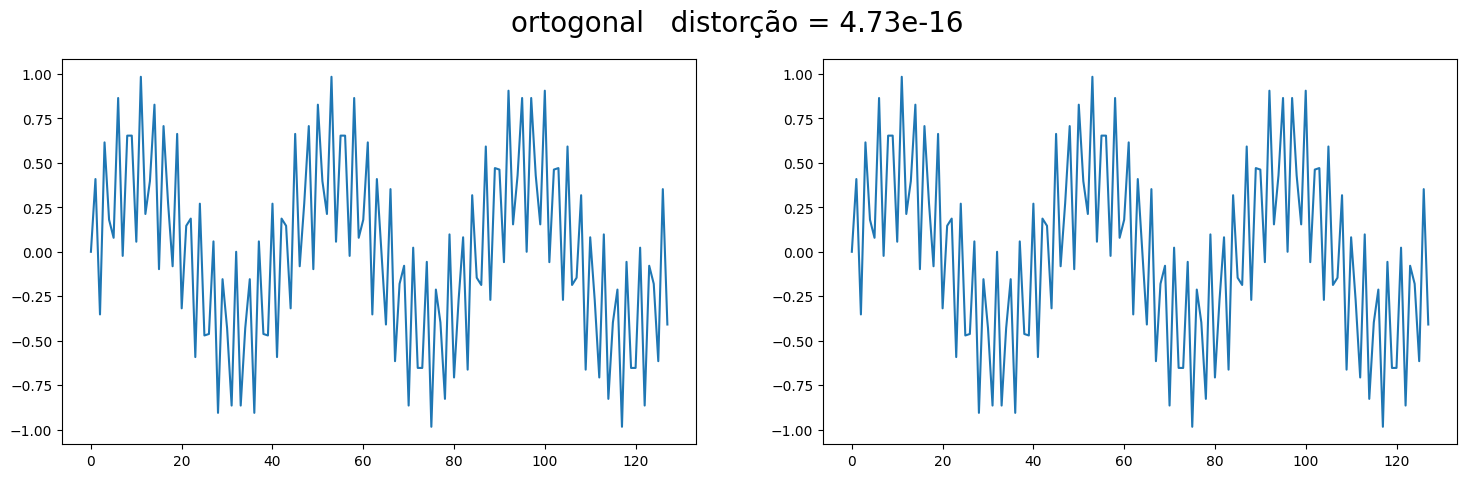

In [50]:
x = create_signal(example=1)
test_haar(x, kind='traditional')
plt.figure()
test_haar(x, kind='ortogonal')

<Figure size 640x480 with 0 Axes>

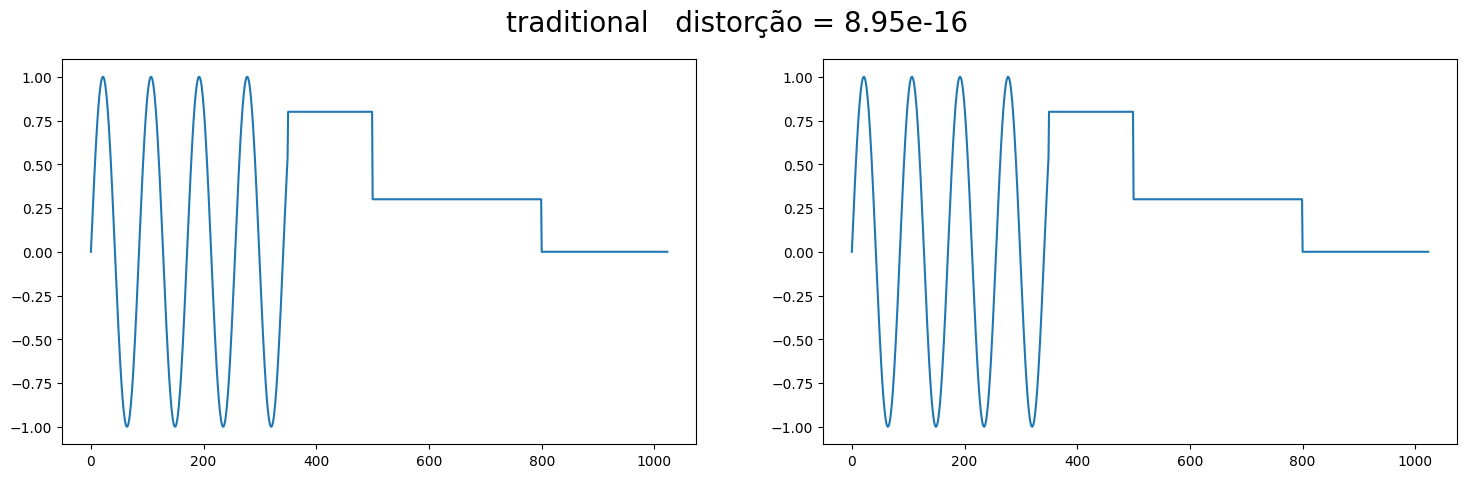

<Figure size 640x480 with 0 Axes>

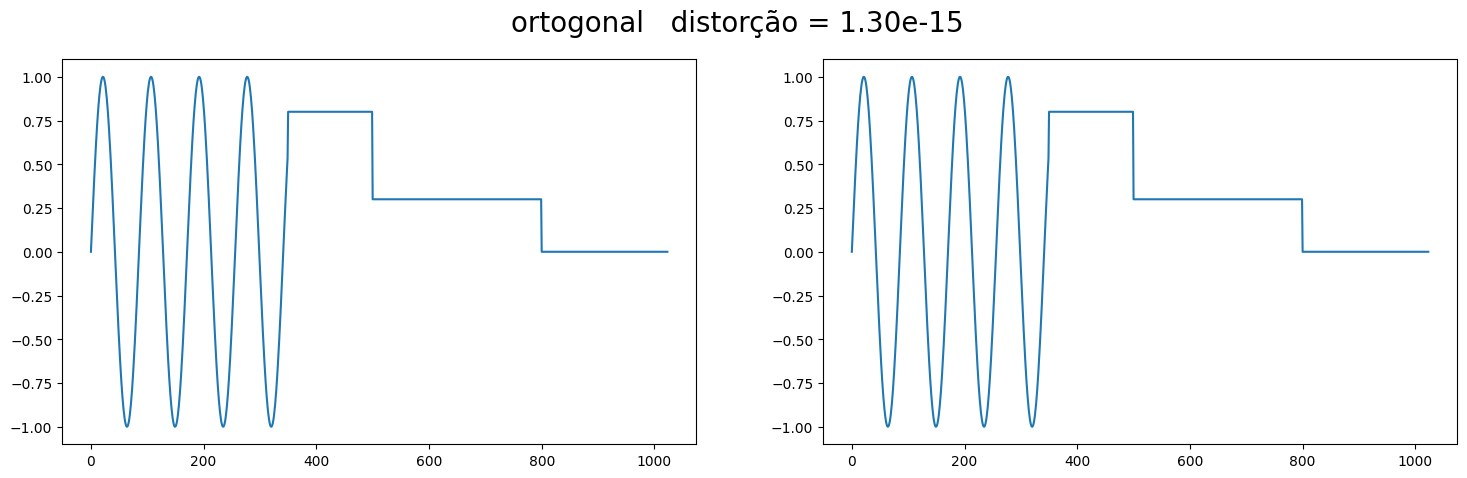

In [51]:
x = create_signal(example=2)
test_haar(x, kind='traditional')
plt.figure()
test_haar(x, kind='ortogonal')